## 1) Delivery_Time -> Predict delivery time using sorting time.

In [1]:
#Importing necessary liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
dtst=pd.read_csv('Downloads/delivery_time.csv')
dtst.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [3]:
dtst.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dtst=dtst.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dtst

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

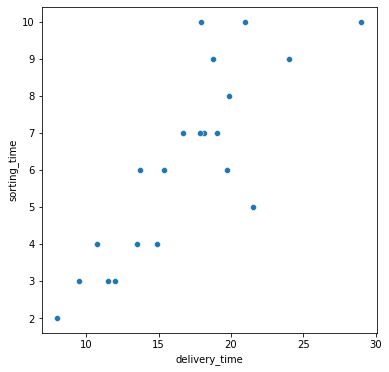

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='delivery_time',y='sorting_time',data=dtst,palette='Set1')

### Correlation

In [7]:
dtst.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\ancha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

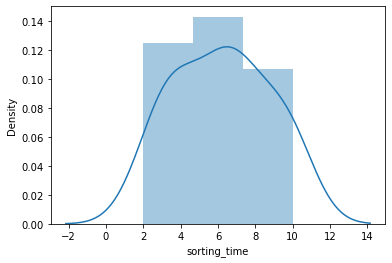

In [8]:
sns.distplot(dtst['sorting_time'])

C:\Users\ancha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

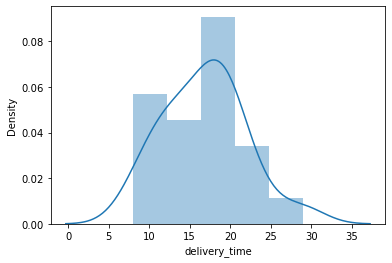

In [9]:
sns.distplot(dtst['delivery_time'])

### Fitting a Linear Regression Model

Model 1

In [10]:
model=smf.ols('delivery_time ~ sorting_time',data=dtst).fit()

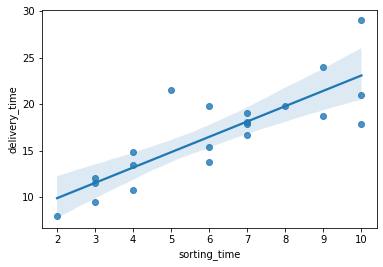

In [11]:
sns.regplot(x='sorting_time',y='delivery_time',data=dtst);

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        23:00:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Predicted values of dilevery_time using the model.

pred=model.predict(dtst)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

In [16]:
model2=smf.ols('delivery_time ~ np.log(sorting_time)',data=dtst).fit()

In [17]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        23:00:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Predicted values of dilevery_time using the model.

pred1=model2.predict(dtst)
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'delivery_time')

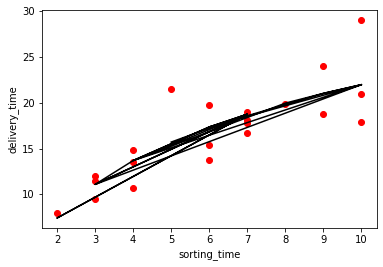

In [20]:
plt.scatter(x=dtst['sorting_time'],y=dtst['delivery_time'],color='red')
plt.plot(dtst['sorting_time'],pred1,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

In [21]:
model2.rsquared

0.6954434611324223

In [22]:
model3=smf.ols('np.log(delivery_time)~ sorting_time',data=dtst).fit()

In [23]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [24]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 12 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                           23:00:42   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Predicted values of dilevery_time using the model3.

pred2=model3.predict(dtst)
pred2

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [26]:
model3.rsquared

0.7109478980584187

Text(0, 0.5, 'delivery_time')

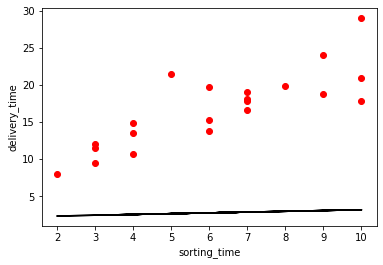

In [27]:
plt.scatter(x=dtst['sorting_time'],y=dtst['delivery_time'],color='red')
plt.plot(dtst['sorting_time'],pred2,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')

Therefore,the greater rsquare is considered the better model.Hence,it is model3. 

### Model Predictions

In [29]:
#Manual prediction for say sorting time 5
delivery_time=(2.121372)+(0.105552)*5
delivery_time

2.649132

In [30]:
#Automatic prediction for say sorting 5,8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [31]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [34]:
model3.predict(data_pred)

0    2.649130
1    2.965785
dtype: float64

## 2) Salary_hike -> Build a prediction model for Salary_hike.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [38]:
dataset=pd.read_csv('Downloads/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
data1=dataset.rename(columns={'YearsExperience':'YE','Salary':'Sal'})
data1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\ancha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

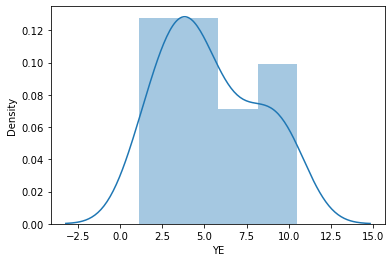

In [41]:
sns.distplot(data1['YE'])

C:\Users\ancha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

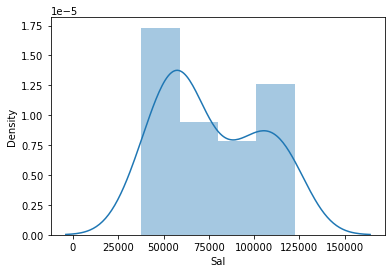

In [42]:
sns.distplot(data1['Sal'])

### Correlation

In [43]:
data1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='YE', ylabel='Sal'>

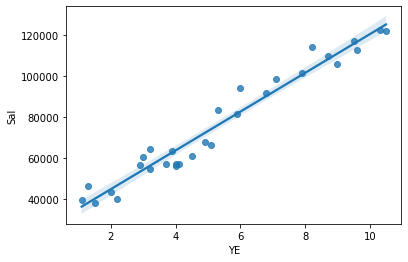

In [44]:
sns.regplot(x=data1['YE'],y=data1['Sal'])

### Model Building

In [45]:
model=smf.ols('Sal~YE',data=data1).fit()

In [46]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        23:46:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model.rsquared

0.9569566641435086

### Model Prediction

In [50]:
#Manual prediction for say 2 years experience

salary=(25792.200199)+(9449.962321)*2
salary

44692.124841

In [51]:
#Automatic prediction for say 2 & 10 years experience

new_data=pd.Series([2,10])
new_data

0     2
1    10
dtype: int64

In [52]:
data_pred=pd.DataFrame(new_data,columns=['YE'])
data_pred

,YE
0,2
1,10


In [53]:
model.predict(data_pred)

0     44692.124842
1    120291.823413
dtype: float64

From above we can say that ,this is the best model.